In [2]:
library(tidyverse)
library(plyr)
library(ggrepel)

In [4]:
code_dir <- getwd()
tool_dir <- unlist(strsplit(code_dir,"/"))
tool_dir <- head(tool_dir, length(tool_dir)-1)
tool_dir <- paste(c(tool_dir, "tools"), collapse="/")
source(file.path(tool_dir, "pl_functions.R"))
base_dir <- gsub("/plotting_codes", "", code_dir)
base_dir

Parsed with column specification:
cols(
  gs_name = col_character(),
  type = col_character(),
  use = col_character(),
  plot_use = col_character(),
  abbr = col_character(),
  order = col_double()
)

Parsed with column specification:
cols(
  gs_name = col_character(),
  gene_symbol = col_character()
)



[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

In [5]:
exp_name <- "2_IL2RAKO_Nascent"

use.path <- file.path(base_dir, '9_Figures', exp_name, 
                      'volcano_plots')
dir.create(use.path, showWarnings = FALSE, recursive=TRUE)
setwd(use.path)

# WT v.s. KO

In [10]:
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/2_DE/0_original_GN'

*48h*

Parsed with column specification:
cols(
  `Unnamed: 0` = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double(),
  gene_name = col_character()
)



  side TRM_vs_TCM-TEM Tstem
1   up            329    11
2   dn            219   194


Warning message:
“Removed 9380 rows containing missing values (geom_point).”
Warning message:
“Removed 891 rows containing missing values (geom_point).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”
Warning message:
“Removed 9380 rows containing missing values (geom_point).”
Warning message:
“Removed 891 rows containing missing values (geom_point).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”
Warning message:
“Removed 9380 rows containing missing values (geom_point).”
Warning message:
“Removed 891 rows containing missing values (geom_point).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


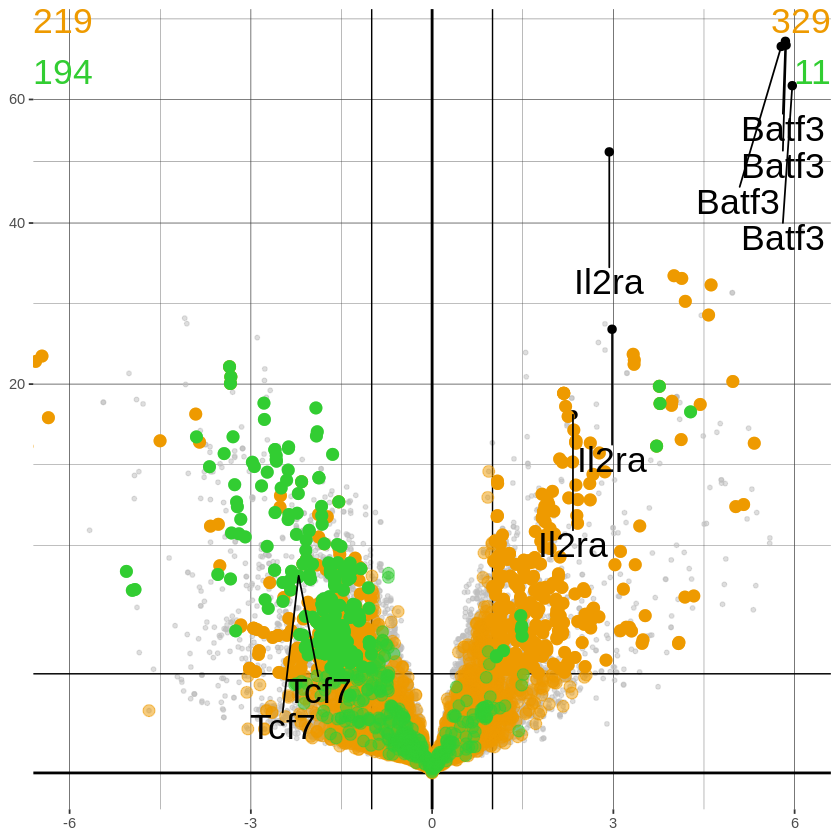

In [23]:
###----- Setup
de.file <- file.path(de.dir, 'nondupr_WT_48h_vs_KO_48h_addGN.csv')
outname.base <- "WT48h_vs_KO48h"
use.genes <- c("Il2ra", "Tcf7", "Batf3")
log2fc.c <- 1
nlog10p.c <- 1.3
gs.vec <- c("TRM_vs_TCM-TEM", "Tstem")
gs.col.vec <- c("orange2", "limegreen")
log2fc.range <- c(-6,6)
nlog10pval.max <- 70


de.df <- read_csv(de.file)
colnames(de.df) <- c('ENSEMBL', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$padj)

# Plot 
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c,log2fc.range, nlog10pval.max) # With label
vol_plot <- vol_plot_out$plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save summary
write_csv(vol_plot_out$sum, paste(outname.base, "_sum.csv", sep=""))